<a href="https://colab.research.google.com/github/nug1209/reuse/blob/main/r_data_analysis_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# @title Preparation
install.packages("googledrive")
install.packages("ggthemes")
library("RColorBrewer")
library("ggthemes")
library("googledrive")
library("dplyr")
library("tidyr")
library("ggplot2")

if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab_ipython.py")){
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Set the theme**: theme_gdocs(), theme_few()

In [79]:
theme <- theme_few()

**FUNCTIONS**

preview :

preview(df)

bar plot :

bar(df, x, y, title, subtitle, caption, x_lab, y_lab, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10)

horizontal count bar plot :

bar_count_h(df, count, title, subtitle, caption, x_lab, y_lab, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10)

grouped bar plot :

bar_group(df, x, y, fill, title, subtitle, caption, x_lab, y_lab, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10)

stacked bar plot :

bar_stack(df, x, y, fill, title, subtitle, caption, x_lab, y_lab, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10)

scatter plot :

scatter(df, x, y, title, subtitle, caption, x_lab, y_lab, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10)

filled scatter plot :

scatter_fill(df, x, y, fill, title, subtitle, caption, x_lab, y_lab, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10)

histogram :

histogram(df, x, binwidth, title, subtitle, caption, x_lab, y_lab, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10)

box plot :

boxplot(df, x, y, title, subtitle, caption, x_lab, y_lab, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10)

In [80]:
# @title . . .

# PREVIEW DATA
preview <- function(df){
  cat("DIMENSION\n")
  print(dim(df))
  cat("\nSUMMARY\n")
  print(summary(df))
  cat("\nHEAD\n")
  head(df)
}

# GROUPED HISTOGRAM
hist_group <- function(df, x, facet, binwidth, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
                    ggplot(df, aes(x = {{x}}, fill={{facet}})) + geom_histogram(binwidth=binwidth) + facet_grid(rows = vars({{facet}})) +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab
                        ) +
                    scale_fill_brewer(palette=palette) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
}


# BAR PLOT VERTICAL
bar_v <- function(df, x, y, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
        ggplot(df, aes(x = {{x}}, y = {{y}}, fill = {{x}})) + geom_col() +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab) +
                    scale_fill_brewer(palette=palette) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
        }

# BAR HORIZONTAL
bar_h <- function(df, x, y, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
        ggplot(df, aes(x = {{x}}, y = {{y}}, fill = {{y}})) + geom_col() +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab) +
                    scale_fill_brewer(palette=palette) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
        }


# GROUPED BAR PLOT
bar_group <- function(df, x, y, fill, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
              ggplot(df_temp, aes(x={{x}}, y={{y}}, fill={{fill}})) + geom_col(position="dodge") +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab
                        ) +
                    scale_fill_brewer(palette=palette) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
}

# STACKED BAR PLOT
bar_stack <- function(df, x, y, fill, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
              ggplot(df_temp, aes(x={{x}}, y={{y}}, fill={{fill}})) + geom_col() +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab
                        ) +
                    scale_fill_brewer(palette=palette) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
}

# SCATTER PLOT
scatter <- function(df, x, y, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
            ggplot(df, aes(x = {{x}}, y = {{y}})) + geom_point(color = brewer.pal(3, palette)[1]) +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab
                        ) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
            }

# SCATTER PLOT WITH FILL COLORS
scatter_fill <- function(df, x, y, fill, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
                ggplot(df, aes(x = {{x}}, y = {{y}}, colour = {{fill}})) + geom_point() +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab
                        ) +
                    scale_fill_brewer(palette=palette) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
                }

# HISTOGRAM
hist <- function(df, x, binwidth, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
        ggplot(df, aes(x = {{x}}, fill = brewer.pal(3, palette)[1], color="black")) + geom_histogram(binwidth = binwidth, show.legend=FALSE) +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab
                        ) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
        }

# BOX PLOT
boxplot <- function(df, x, y, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
            ggplot(df, aes(x = {{x}}, y = {{y}}, fill={{x}})) + geom_boxplot() +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab) +
                    scale_fill_brewer(palette=palette) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
}

# BAR PLOT FOR COUNT
bar_count_h <- function(df, count, title, subtitle, caption, x_lab, y_lab, palette="Set2", title_size=20, subtitle_size=15, caption_size=10) {
              ggplot(df, aes(x={{count}}, fill={{count}})) + geom_bar() +
                    theme +
                    labs(title=title,
                        subtitle=subtitle,
                        caption=caption,
                        x=x_lab,
                        y=y_lab
                        ) +
                    scale_fill_brewer(palette=palette) +
                    theme(plot.title = element_text(size=title_size),
                          plot.subtitle = element_text(size=subtitle_size),
                          plot.caption = element_text(size=caption_size))
              }

In [81]:
df <- CO2
preview(df)

DIMENSION
[1] 84  5

SUMMARY
     Plant             Type         Treatment       conc          uptake     
 Qn1    : 7   Quebec     :42   nonchilled:42   Min.   :  95   Min.   : 7.70  
 Qn2    : 7   Mississippi:42   chilled   :42   1st Qu.: 175   1st Qu.:17.90  
 Qn3    : 7                                    Median : 350   Median :28.30  
 Qc1    : 7                                    Mean   : 435   Mean   :27.21  
 Qc3    : 7                                    3rd Qu.: 675   3rd Qu.:37.12  
 Qc2    : 7                                    Max.   :1000   Max.   :45.50  
 (Other):42                                                                  

HEAD


,Plant,Type,Treatment,conc,uptake
,<ord>,<fct>,<fct>,<dbl>,<dbl>
1,Qn1,Quebec,nonchilled,95,16.0
2,Qn1,Quebec,nonchilled,175,30.4
3,Qn1,Quebec,nonchilled,250,34.8
4,Qn1,Quebec,nonchilled,350,37.2
5,Qn1,Quebec,nonchilled,500,35.3
6,Qn1,Quebec,nonchilled,675,39.2


In [82]:
df_temp <- df |>
            group_by(Type, Treatment) |>
              summarise(mean_uptake = mean(uptake),
                .groups = 'drop')
df_temp

Type,Treatment,mean_uptake
<fct>,<fct>,<dbl>
Quebec,nonchilled,35.33333
Quebec,chilled,31.75238
Mississippi,nonchilled,25.95238
Mississippi,chilled,15.81429


In [83]:
df2 <- iris
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [84]:
df_temp2 <- subset(df2, Species == "setosa")
head(df_temp2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [85]:
df3 <- sunspot.month
preview(df3)

DIMENSION
NULL

SUMMARY
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   15.70   42.00   51.96   76.40  253.80 

HEAD


[1] 58.0 62.6 70.0 55.7 85.0 83.5

In [86]:
# df3

---
PLOTS



In [87]:
# ggplot(BOD, aes(x = Time, y = demand)) +
#   geom_line()

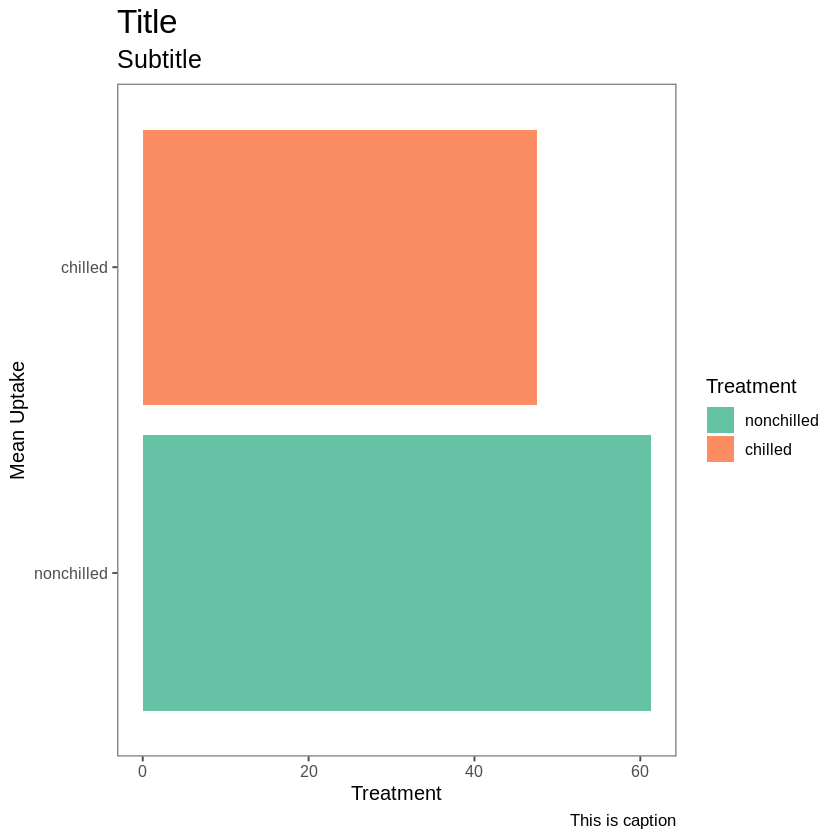

In [88]:
bar_h(df_temp,
      mean_uptake,
      Treatment,
      "Title",
      "Subtitle",
      "This is caption",
      "Treatment",
      "Mean Uptake",
      palette="Set2")

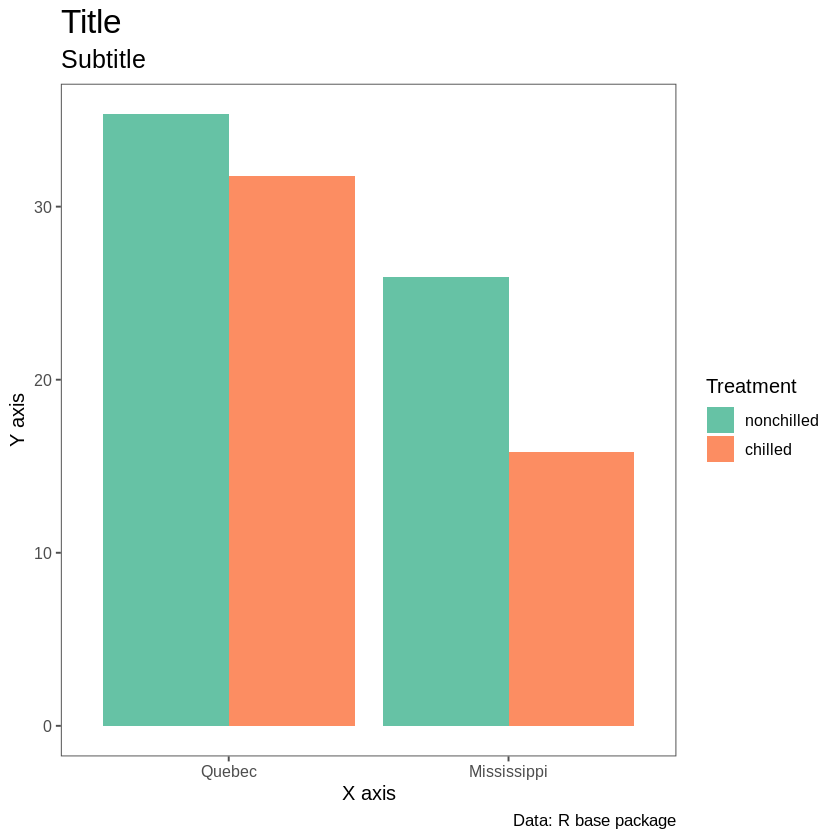

In [89]:
bar_group(df_temp,
          Type,
          mean_uptake,
          Treatment,
          "Title",
          "Subtitle",
          "Data: R base package",
          "X axis",
          "Y axis"
          )

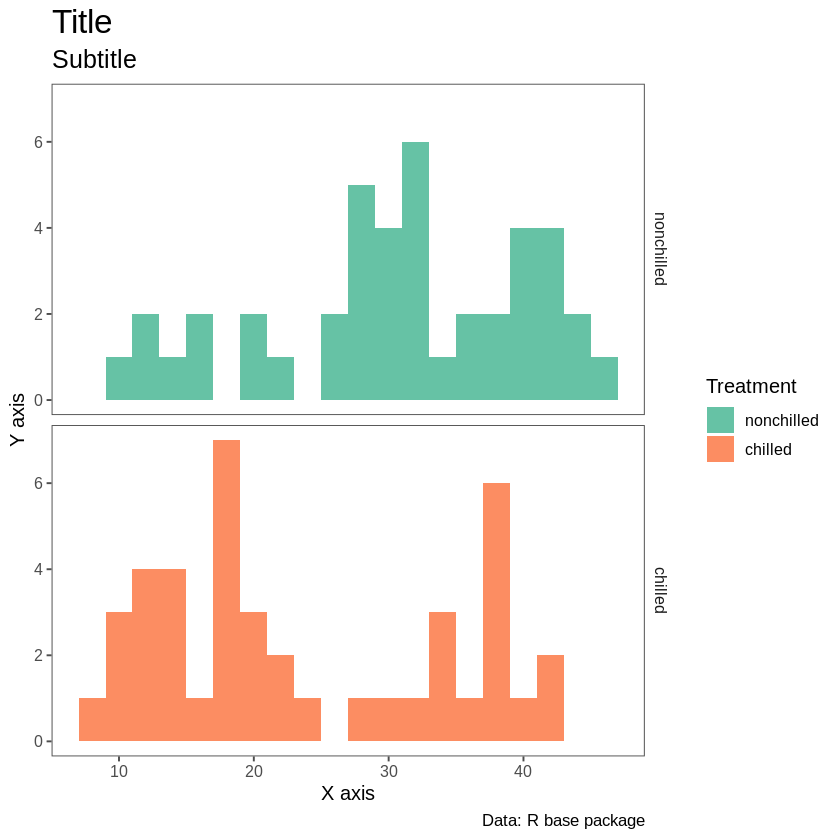

In [90]:
hist_group(df, uptake, Treatment, 2,
          "Title",
          "Subtitle",
          "Data: R base package",
          "X axis",
          "Y axis")

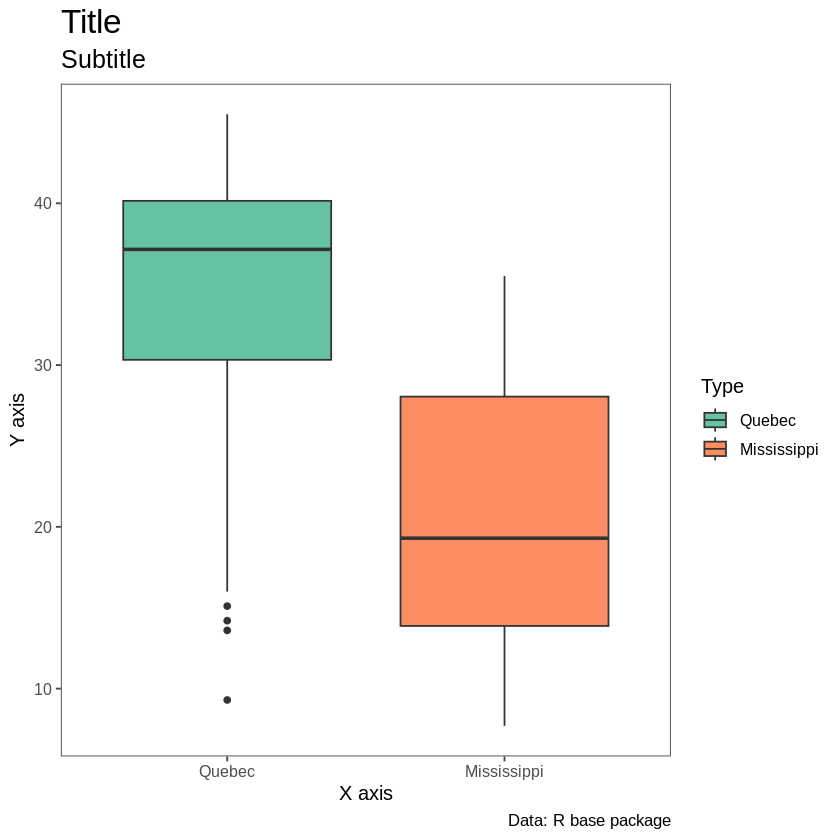

In [91]:
boxplot(df, Type, uptake,
          "Title",
          "Subtitle",
          "Data: R base package",
          "X axis",
          "Y axis")

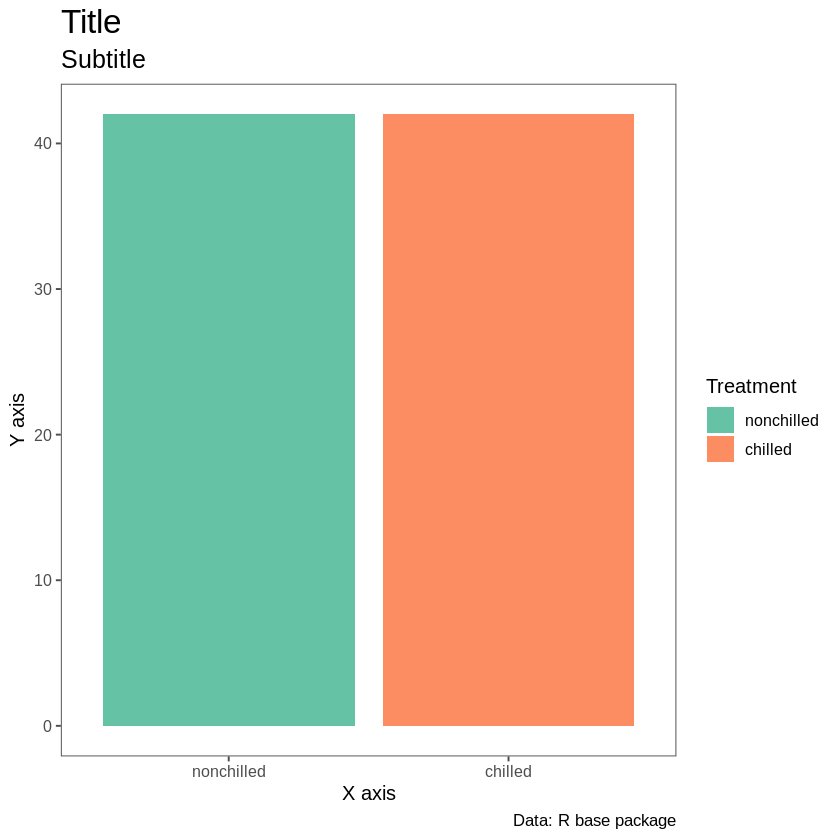

In [92]:
bar_count_h(df, Treatment,
          "Title",
          "Subtitle",
          "Data: R base package",
          "X axis",
          "Y axis")

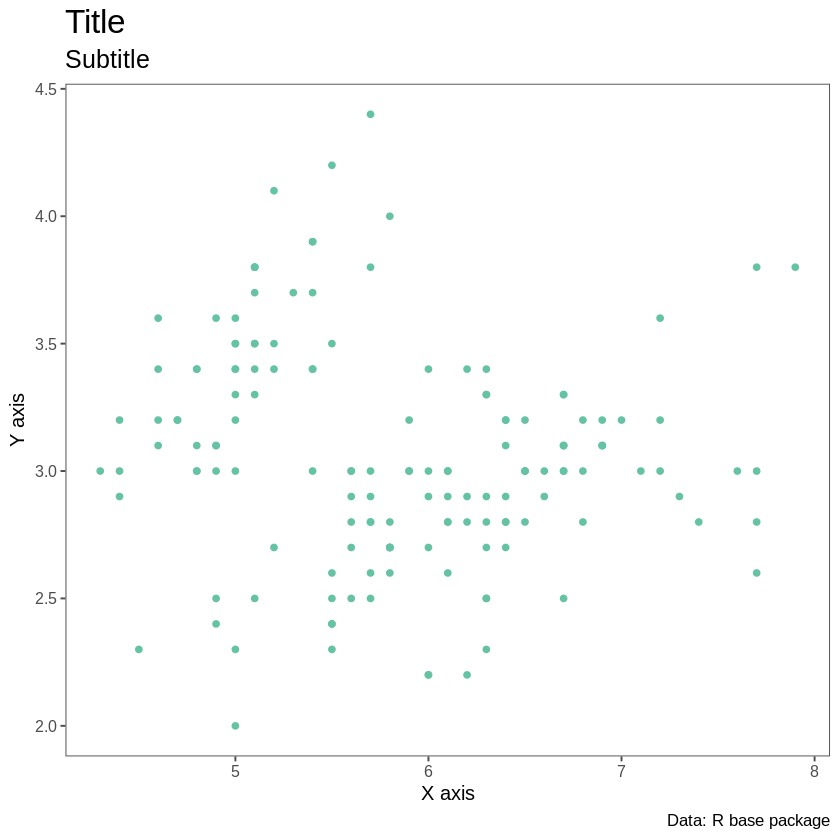

In [93]:
scatter(df2, Sepal.Length, Sepal.Width,
          "Title",
          "Subtitle",
          "Data: R base package",
          "X axis",
          "Y axis")

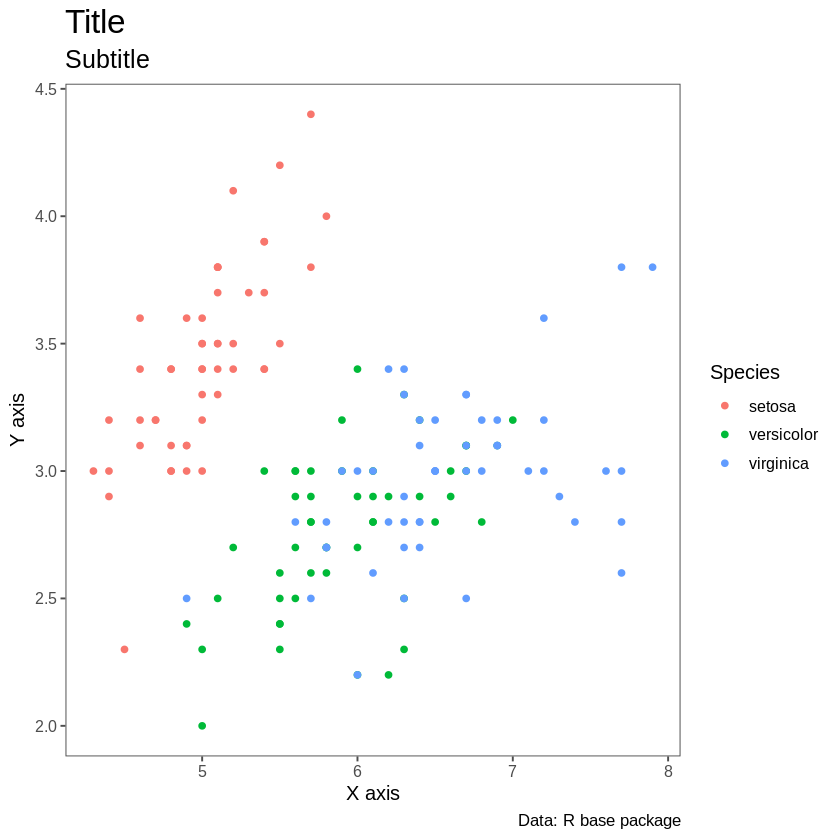

In [94]:
scatter_fill(df2, Sepal.Length, Sepal.Width, Species,
          "Title",
          "Subtitle",
          "Data: R base package",
          "X axis",
          "Y axis")

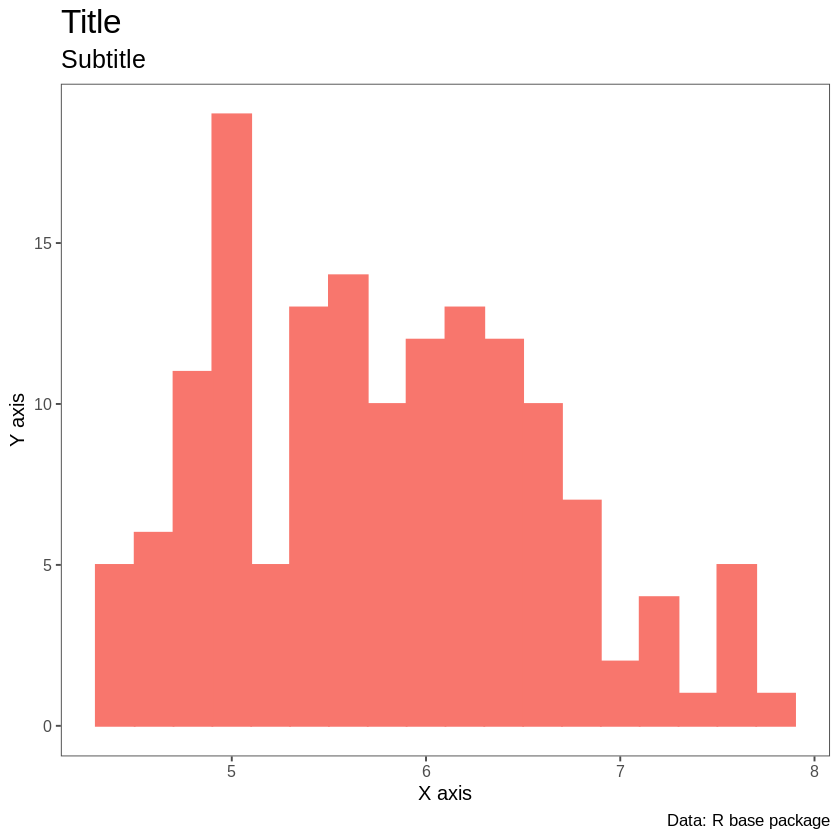

In [95]:
hist(df2, Sepal.Length, 0.2,
          "Title",
          "Subtitle",
          "Data: R base package",
          "X axis",
          "Y axis")